## Setup

In [33]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency, calculate_poisson_predictions, calculate_negative_binomial_predictions, format_prediction_table, format_prediction_table
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [34]:
INAUGURATION_DATE = datetime(2025, 1, 20)
CONTEXT_WINDOW = 200 # words to display for context

In [35]:
PHRASES = ['Unite',
 'UK / United Kingdom',
 'Two-State / Two State',
 'Trump',
 'Qatar',
 'Peace Deal / Peace Treaty',
 'Palestine / Palestinian',
 'October 7 / October 7th / October Seventh / October Seven',
 'Nuclear',
 'Lebanon',
 'Iran',
 'Hostage',
 'France',
 'Eliminate',
 'Distract',
 'Ceasefire',
 'Canada',
 'Antisemitic / Antisemitism',
 'Abraham',
 '1948']

# PHRASES = ['Hamas', # 15+ times
#  'Trump',
#  'Slander',
#  'Palestine',
#  'October 7 / October 7th',
#  'Qatar',
#  'Yemen',
#  'Palau / Paraguay / Hungary',
#  'Israel', # 50+ times
#  'Iran', # 25+ times
#  'Antisemitic / Antisemitism', # 5+ times
#  'Charlie / Kirk',
#  'Abraham Accord',
#  'Goon',
#  'Human Shield',
#  'Crypto / Bitcoin',
#  'Hostage', # 3+ times
#  'Proxy']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'1948': "\\b(?:\\w+-)*(?:1948|1948S|1948's|1948s'|1948S')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Abraham': "\\b(?:\\w+-)*(?:abraham|abrahams|abraham's|abrahams')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Antisemitic / Antisemitism': "\\b(?:\\w+-)*(?:(?:antisemitic|antisemitics|antisemitic's|antisemitics'|antisemitism|antisemitisms|antisemitism's|antisemitisms'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Canada': "\\b(?:\\w+-)*(?:canada|canadas|canada's|canadas')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Ceasefire': "\\b(?:\\w+-)*(?:ceasefire|ceasefires|ceasefire's|ceasefires')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Distract': "\\b(?:\\w+-)*(?:distract|distracts|distract's|distracts')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Eliminate': "\\b(?:\\w+-)*(?:eliminate|eliminates|eliminate's|eliminates')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'France': "\\b(?:\\w+-)*(?:france|frances|france's|frances')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Hostage': "\\b(?:\\w+-)*(?:hostage|hostages|hostage's|hostages')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Iran': "\\b(?:\\w+-)*(

In [36]:
# Set the category of interest
# CATEGORY_OF_INTEREST = "speech"

# Process transcripts
df = process_directory('../data-netanyahu/raw-transcripts', SEARCH_PHRASES)
df = df.sort_values('date')

# Split data by date and category
# category_mask = df['category'] == CATEGORY_OF_INTEREST

# Create category of interest dataframes 
# df_category = df[category_mask]

# df_non_category = df[~category_mask]


# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")

# print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Total: {len(df_category)}")

# print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Total: {len(df_non_category)}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 

# print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Average length: {df_category['text_length'].mean():.0f} words") 

# print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Average length: {df_non_category['text_length'].mean():.0f} words")


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
# print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")

# print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Date range: {df_category['date'].min().strftime('%Y-%m-%d')} to {df_category['date'].max().strftime('%Y-%m-%d')}")


Categories found in directory:
- raw-transcripts
Dataset Statistics:

All Transcripts:
Total: 5501

Word Count Statistics:

All Transcripts:
Average length: 414 words

Date Ranges:

All Transcripts:


In [37]:
df = df[df['text_length'] > 100]
df_dated = df[df['date'].notnull()]

In [38]:
len(df_dated)


4021

## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



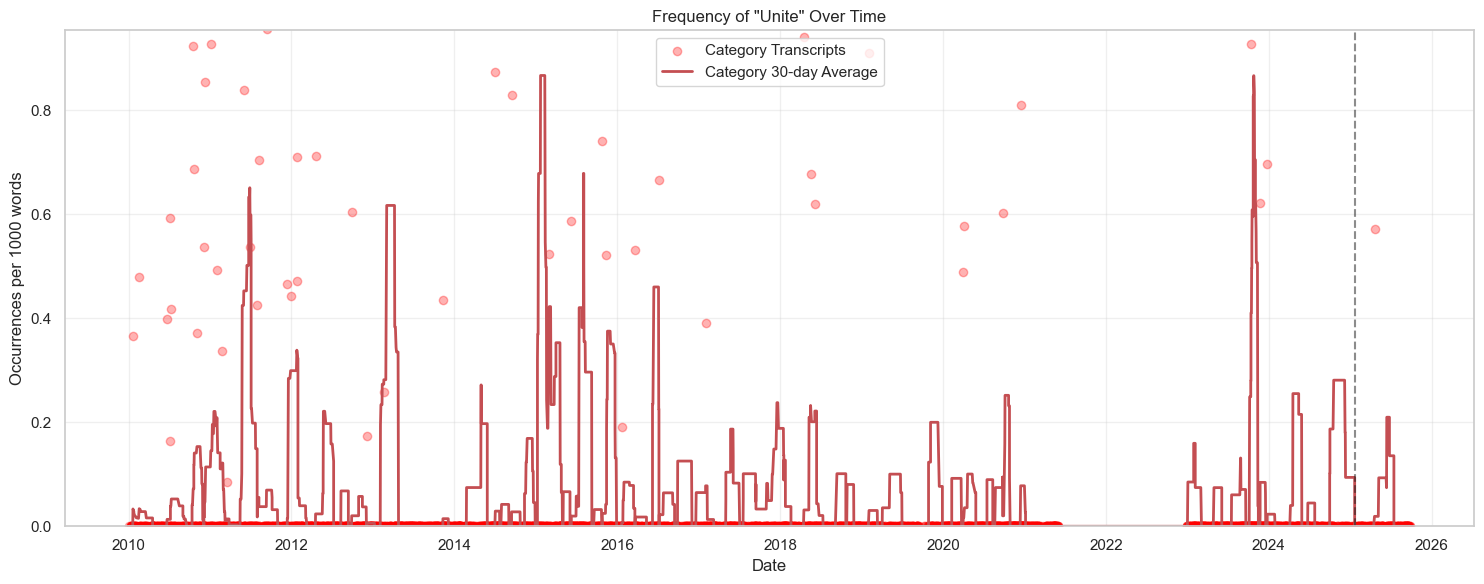

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



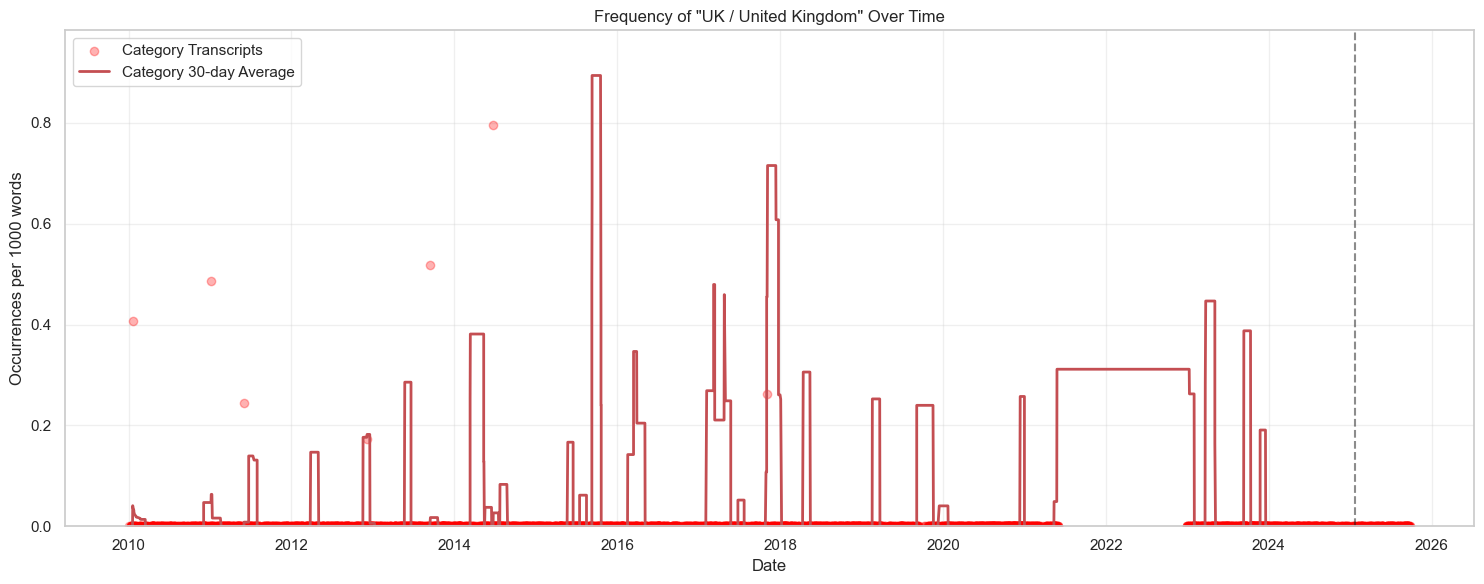

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



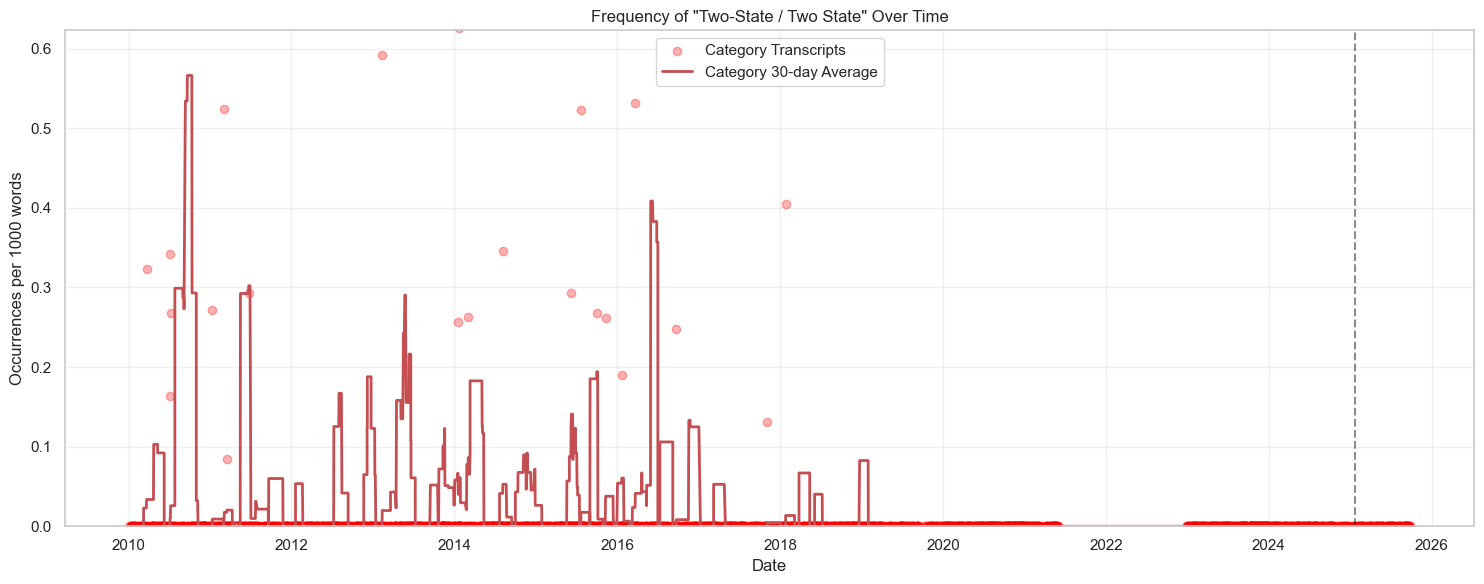

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



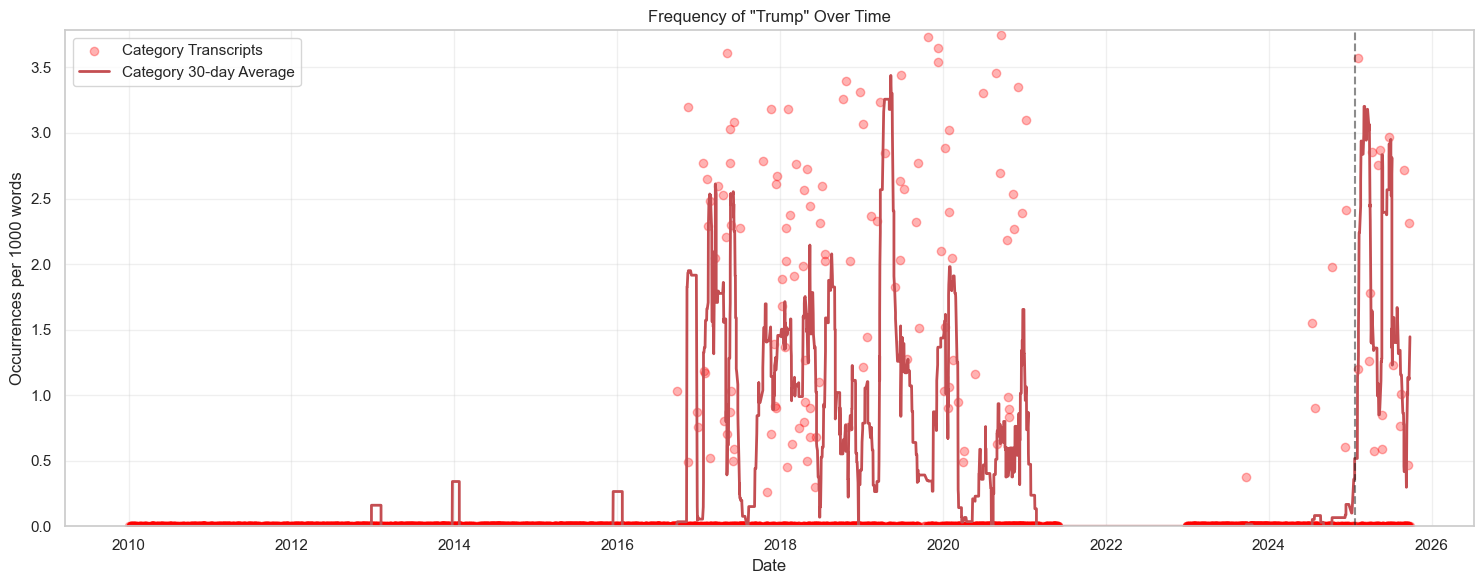

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



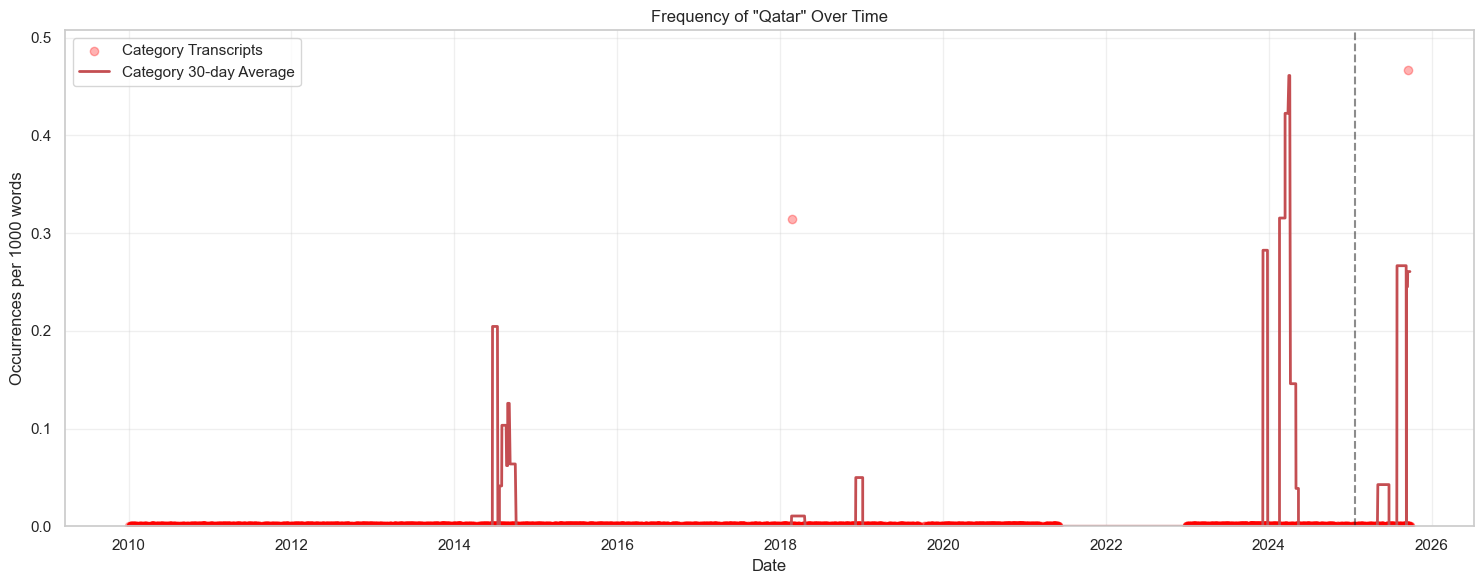

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



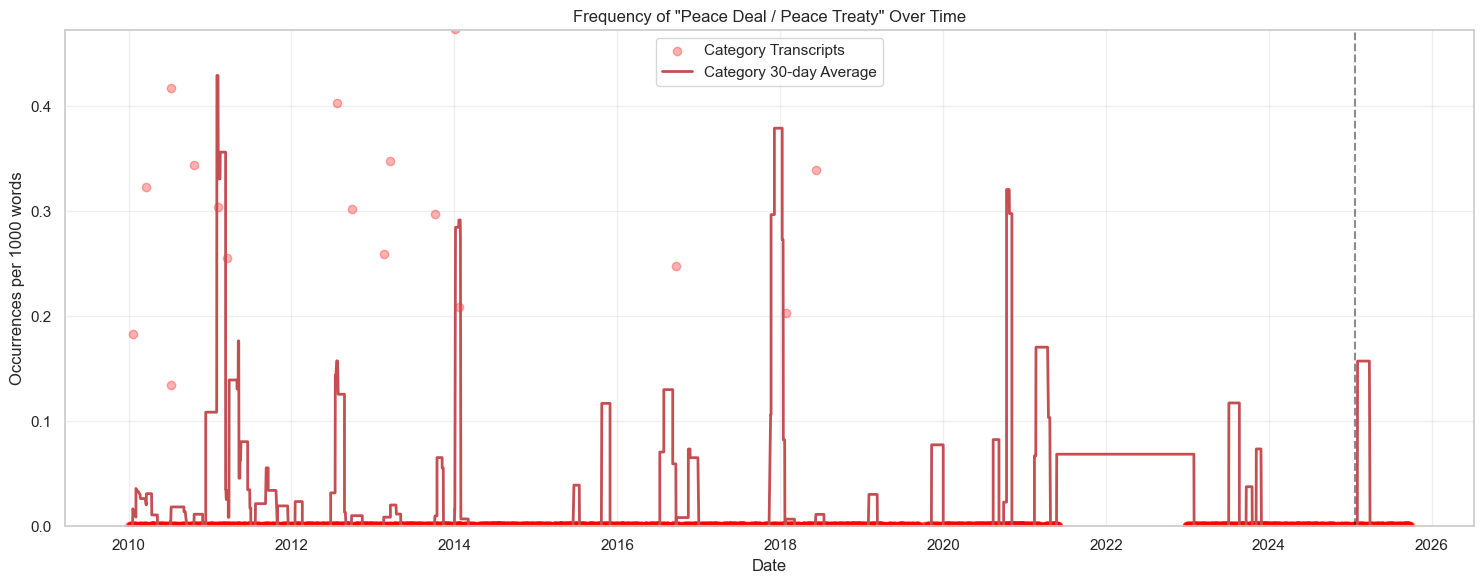

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



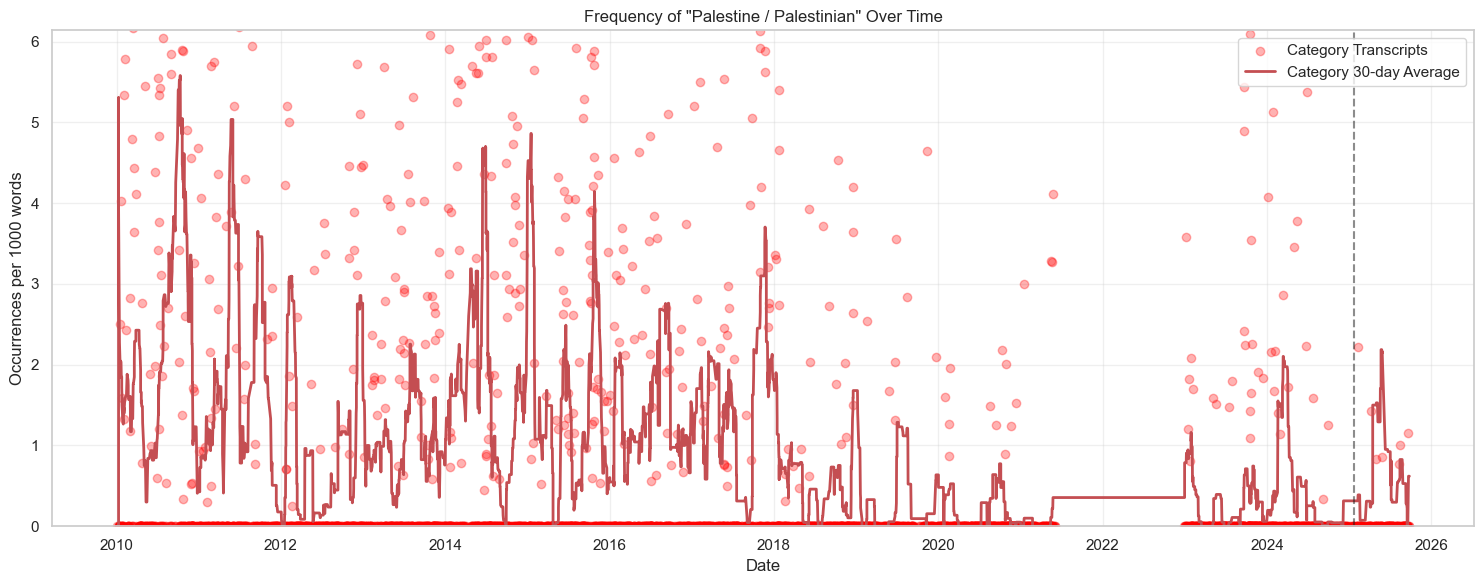

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



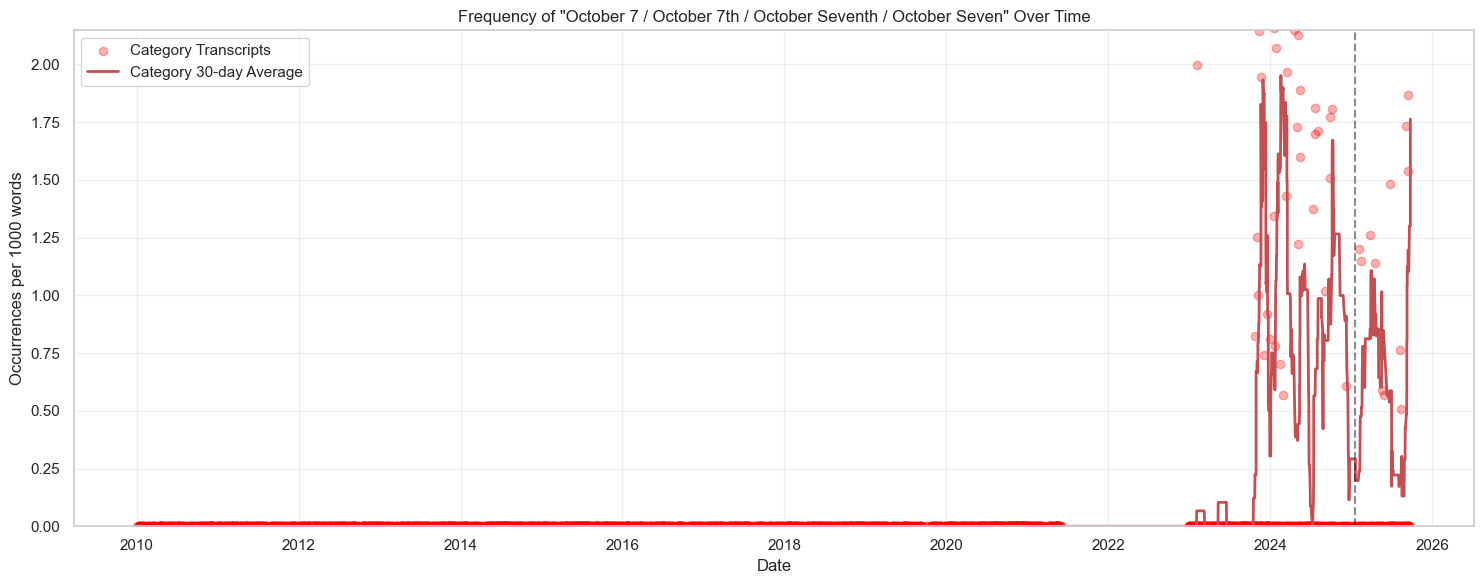

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



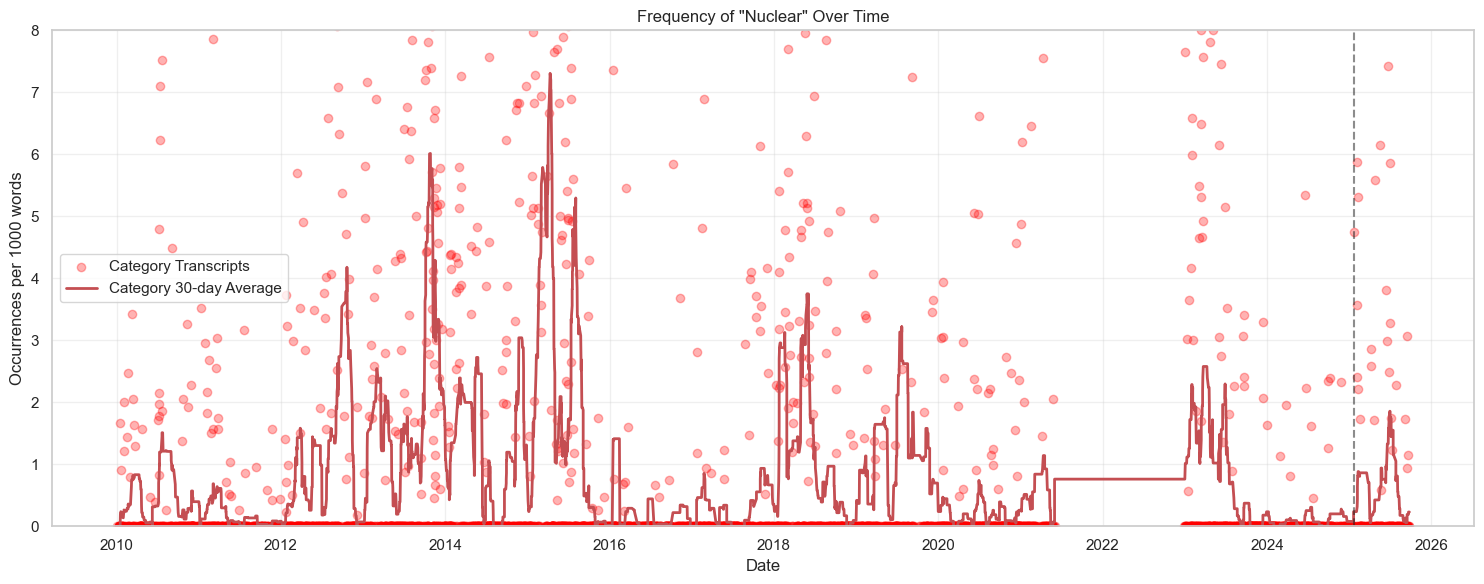

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



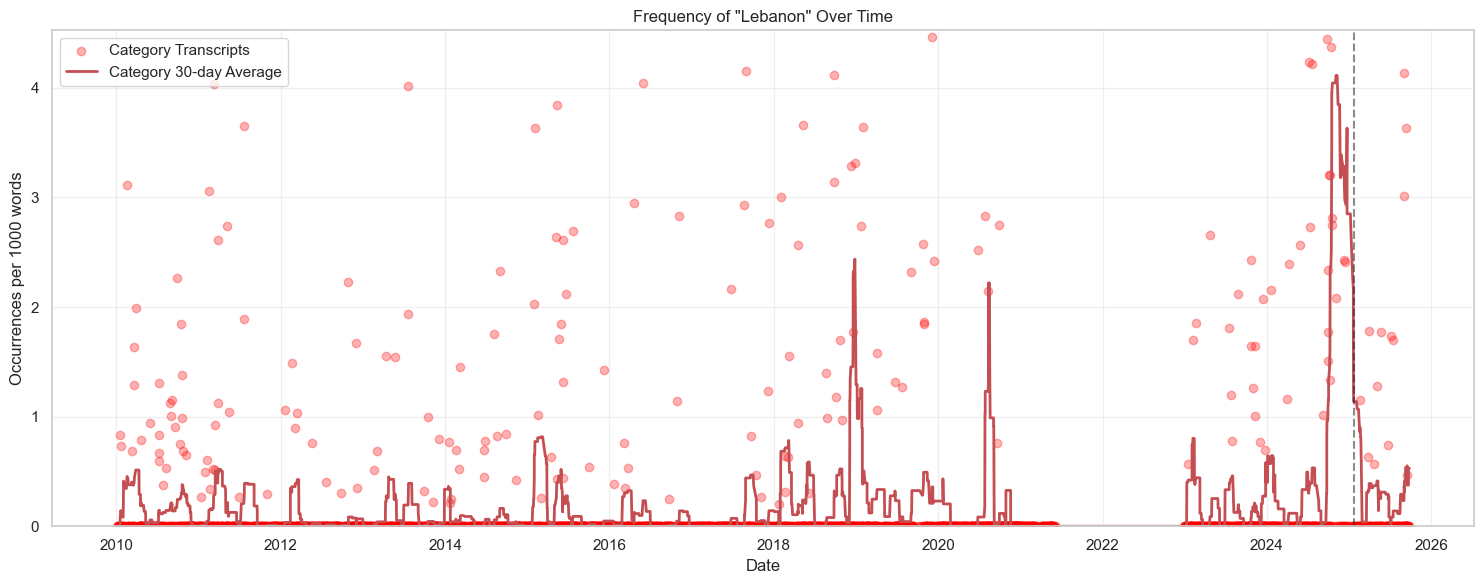

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



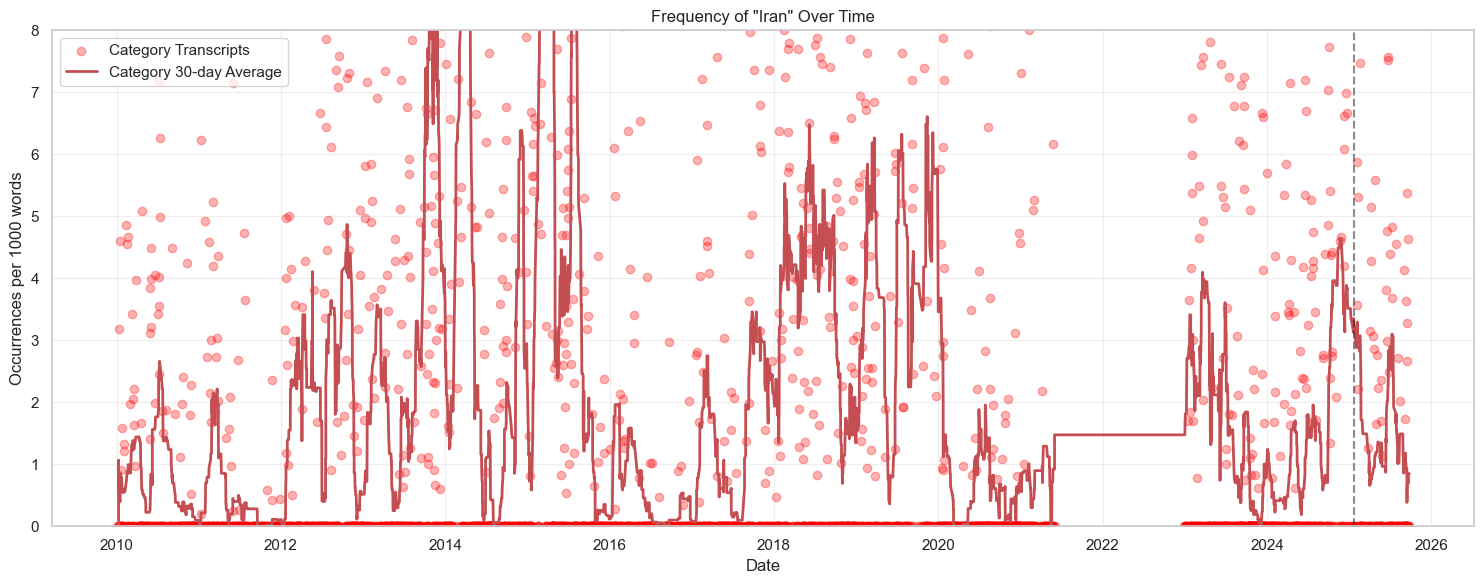

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



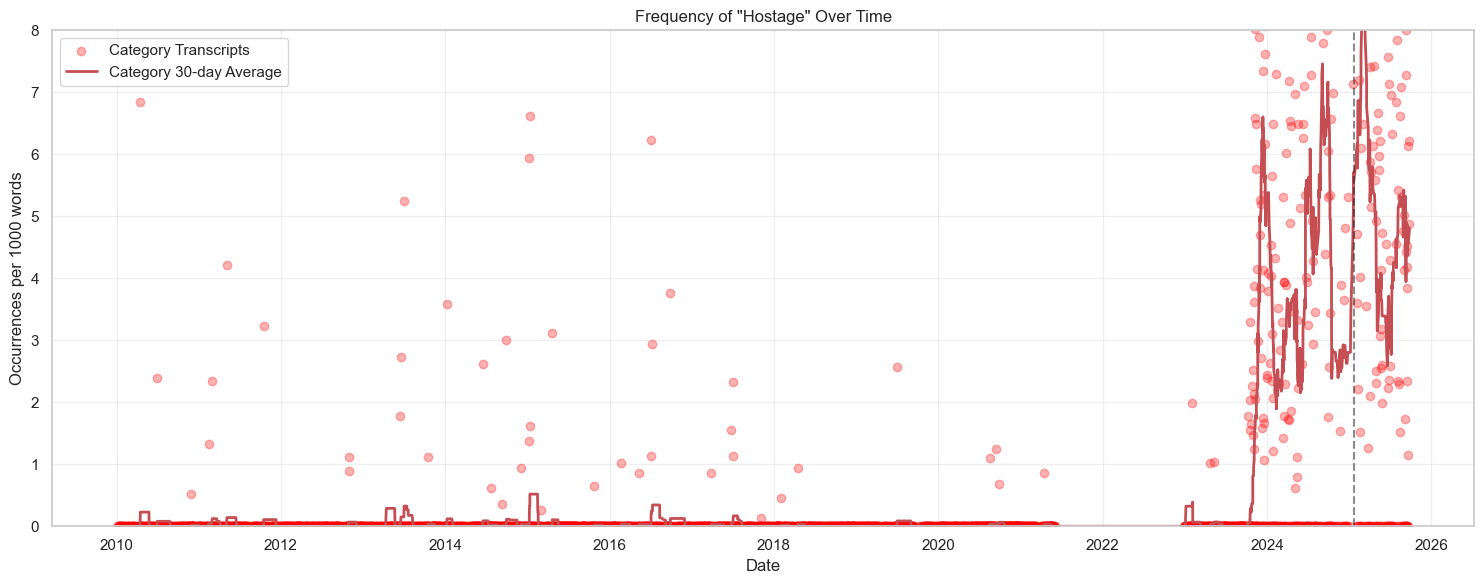

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



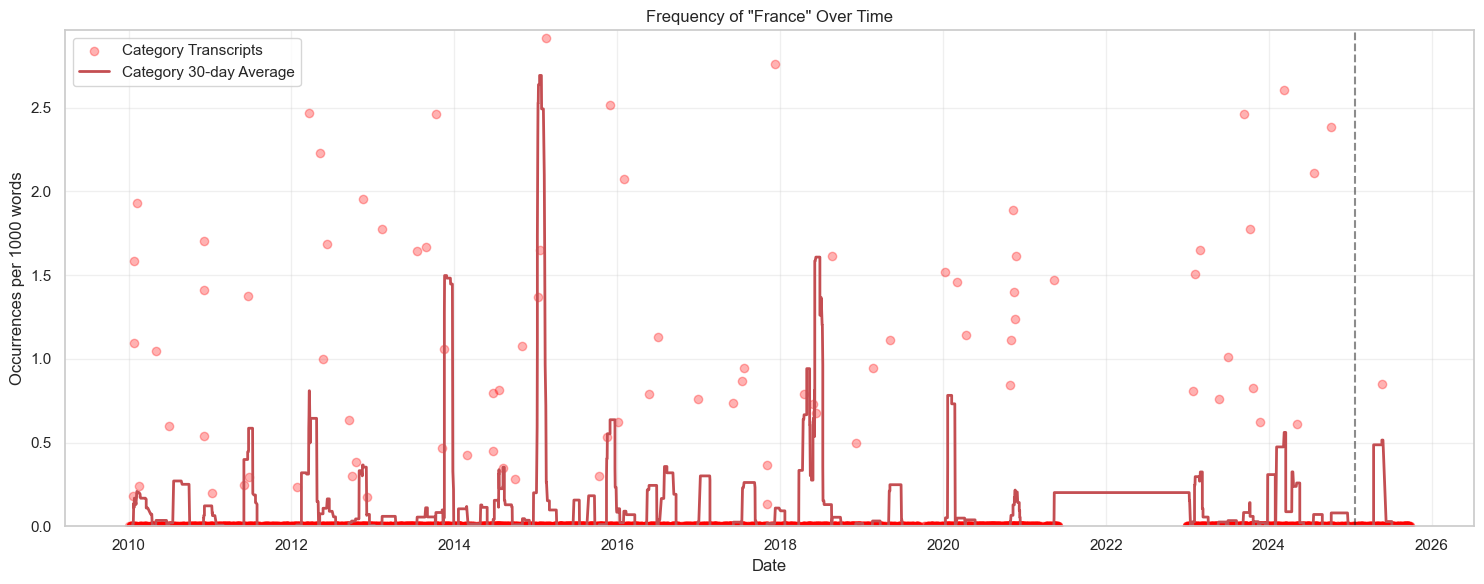

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



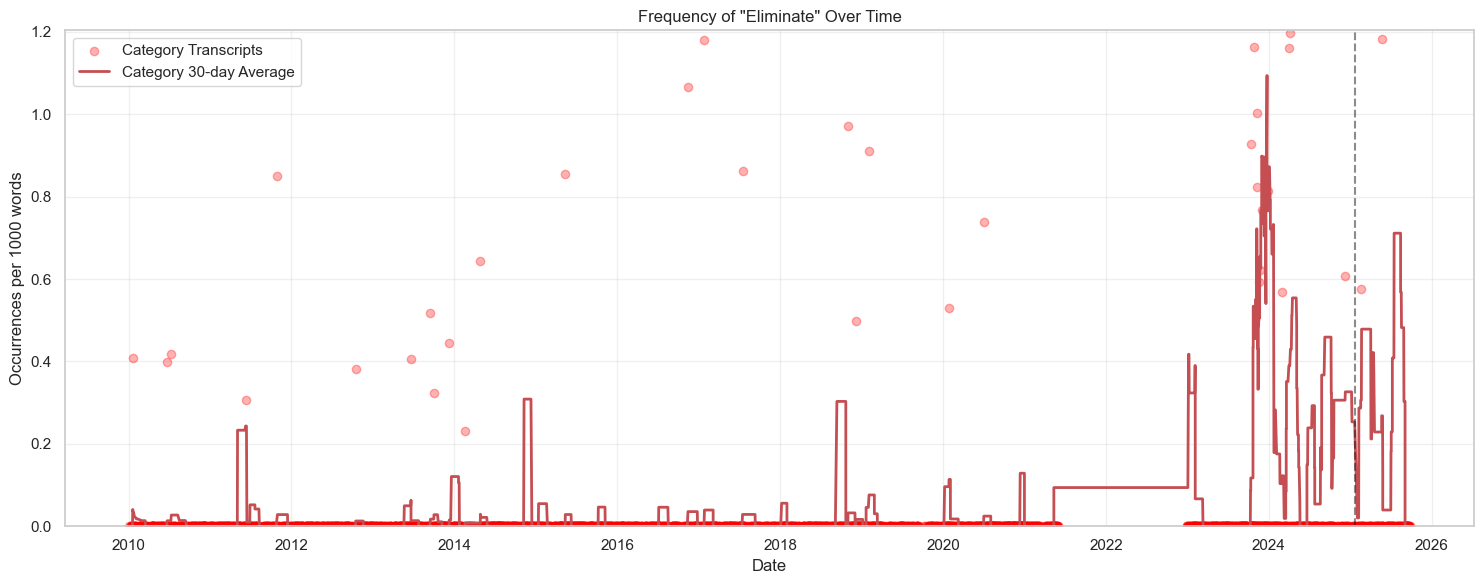

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



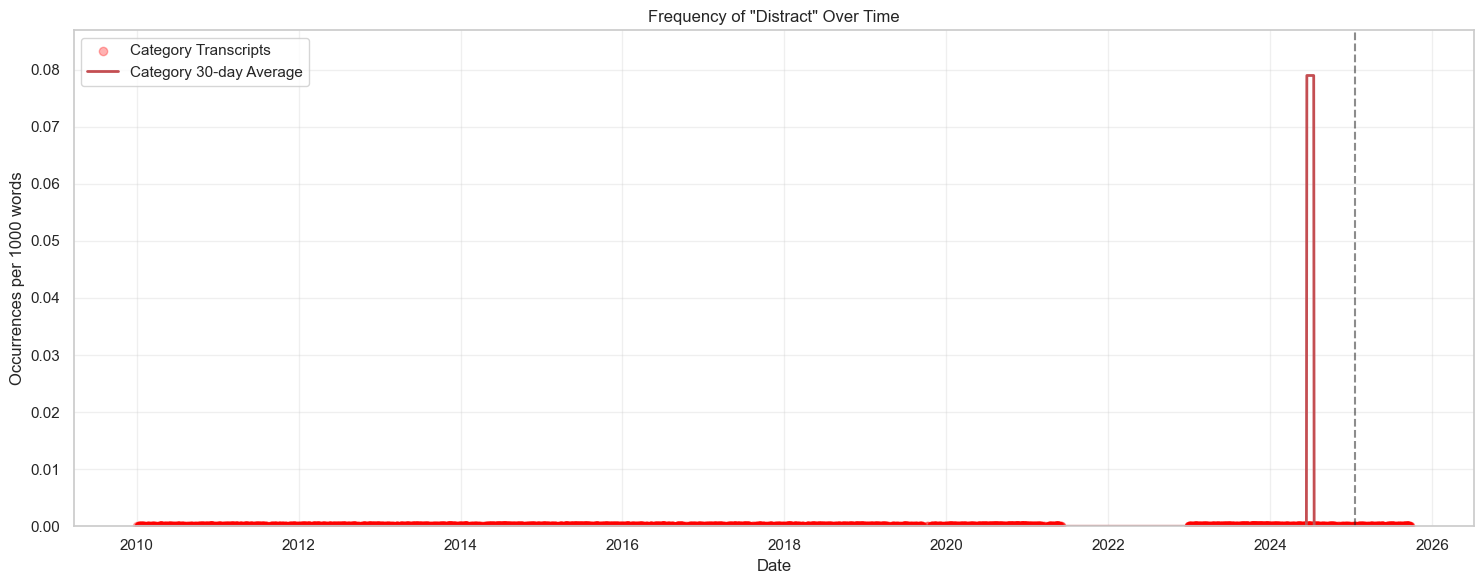

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



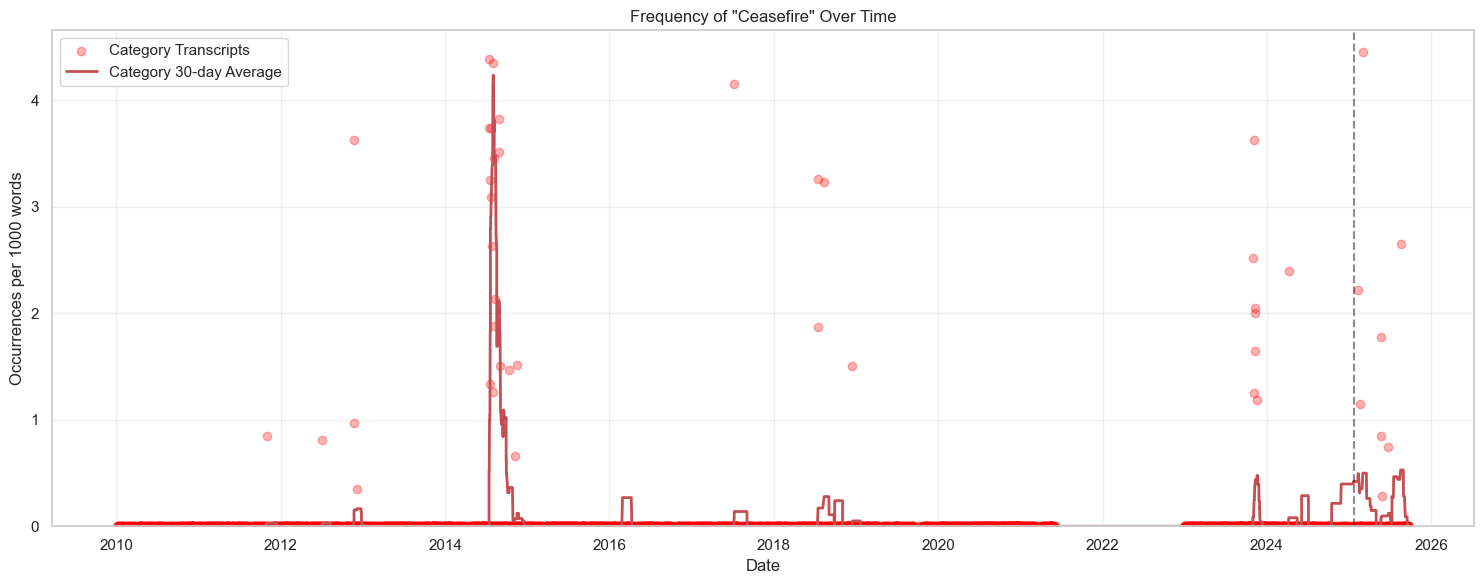

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



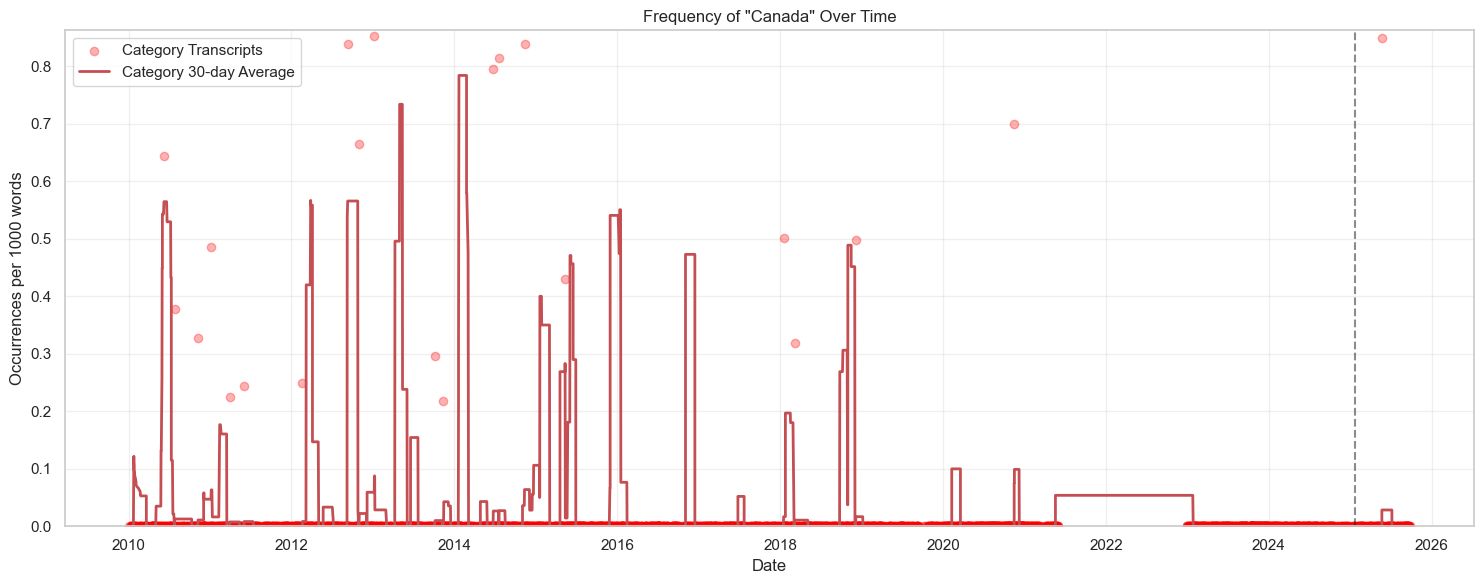

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



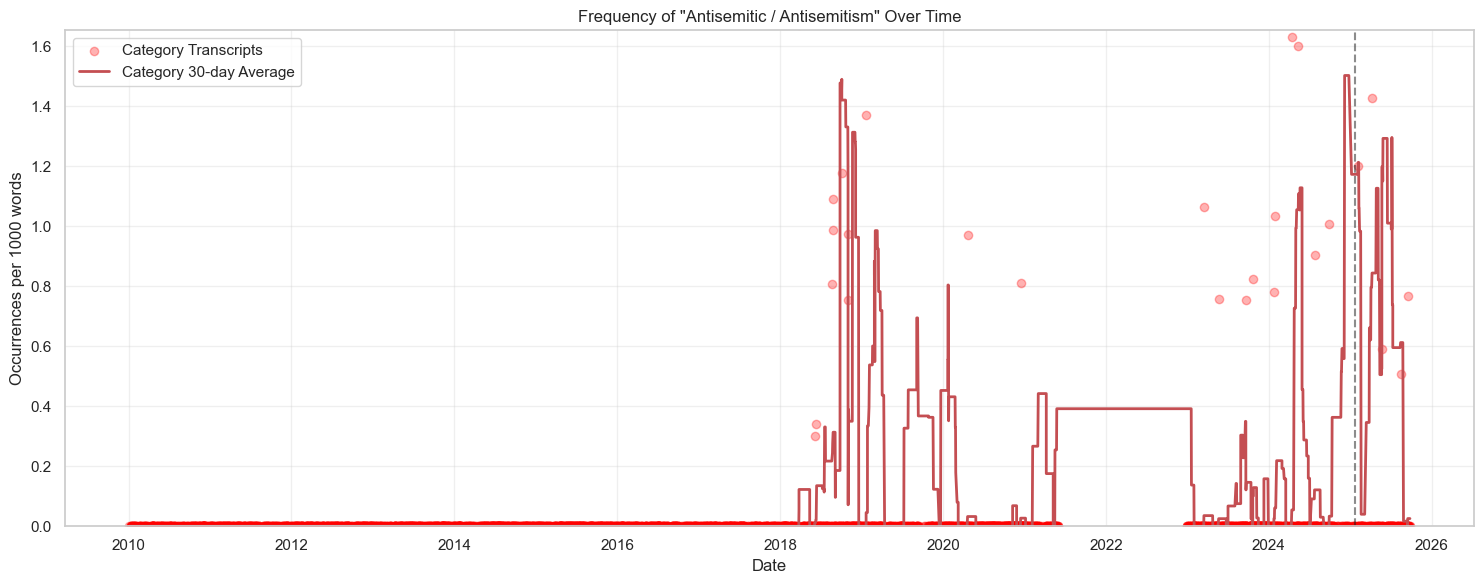

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



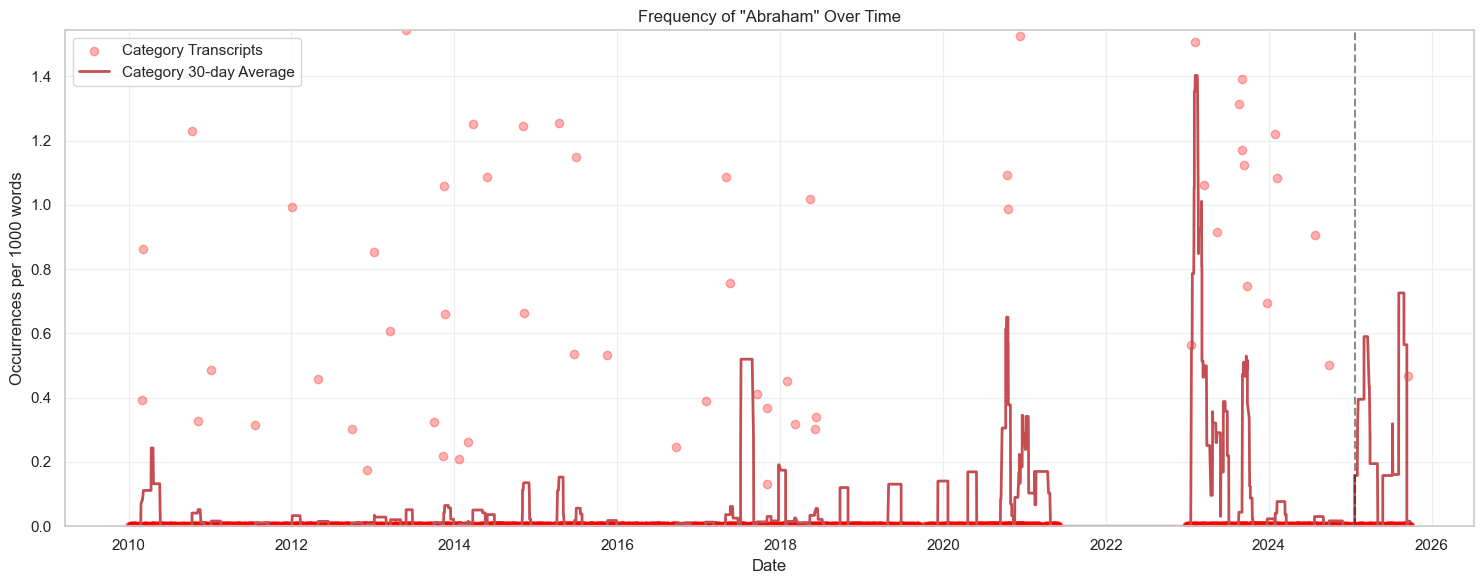

/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)



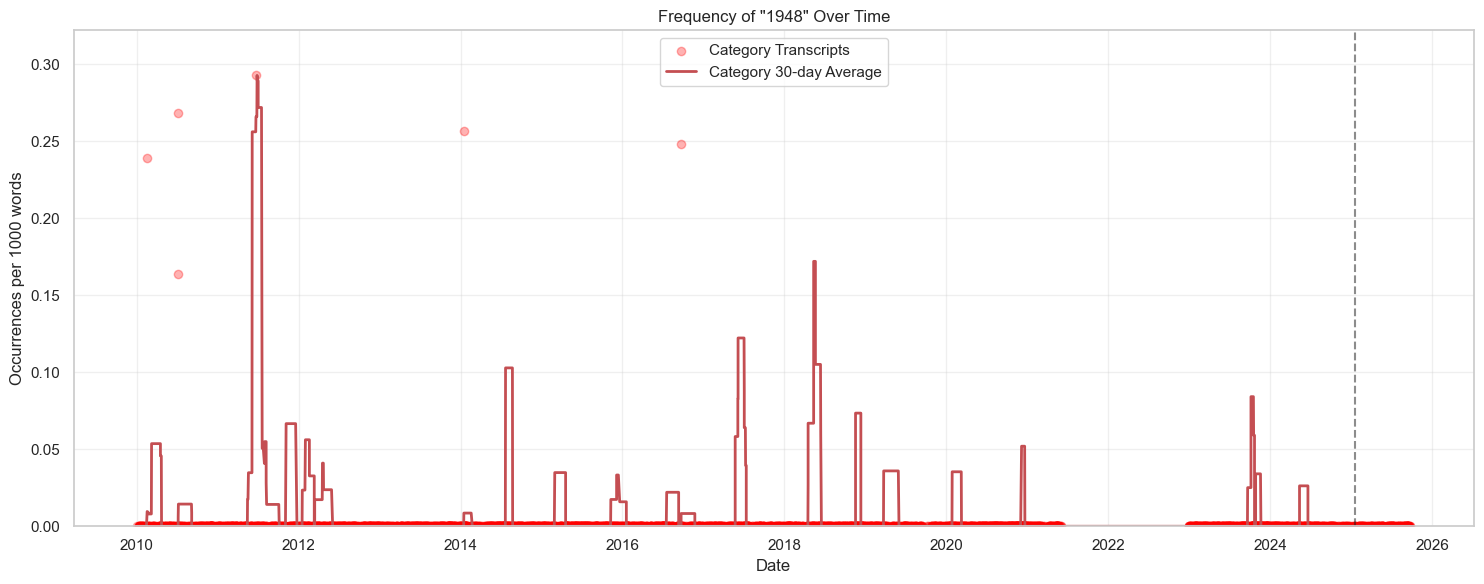

In [39]:
plot_phrase_frequency_over_time_all(df_category=df_dated, phrases=SEARCH_PHRASES, start_date=datetime(2010, 1, 1), end_date=datetime(2025, 9, 25))

Expected length from category data: 538 words


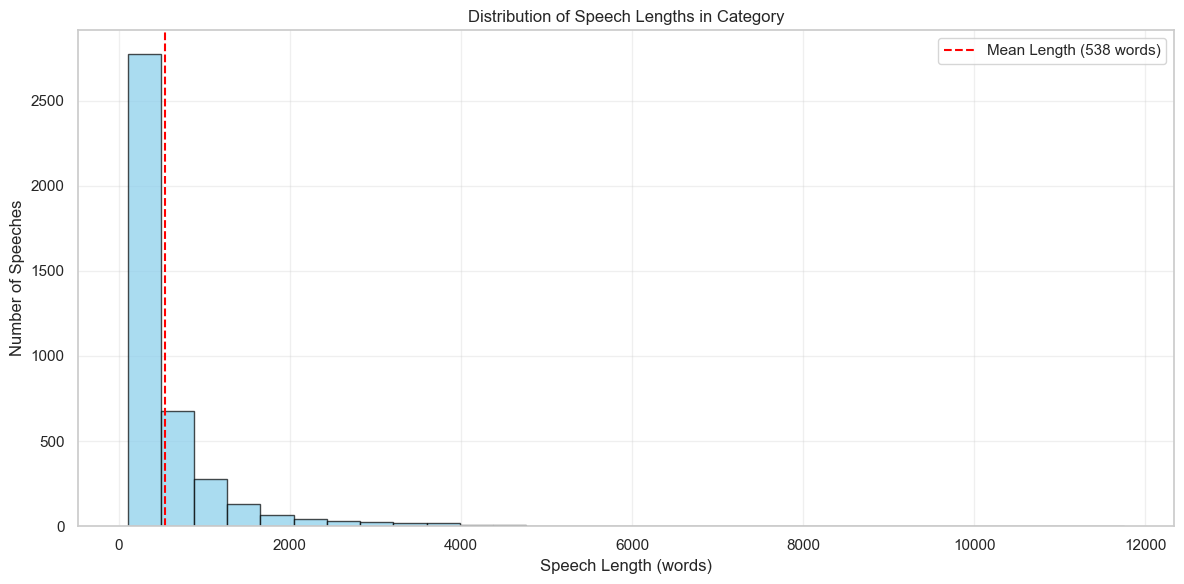

In [40]:
plot_length_distribution(df)

In [48]:
print(len(df[df['text_length'] < 100]['text']))
print(df[df['text_length'] < 100].head(10)
)

0
Empty DataFrame
Columns: [date, file, category, text_length, text, Unite, UK / United Kingdom, Two-State / Two State, Trump, Qatar, Peace Deal / Peace Treaty, Palestine / Palestinian, October 7 / October 7th / October Seventh / October Seven, Nuclear, Lebanon, Iran, Hostage, France, Eliminate, Distract, Ceasefire, Canada, Antisemitic / Antisemitism, Abraham, 1948]
Index: []

[0 rows x 25 columns]


In [42]:
df_un = df[df['file'].str.contains('united nations|UN|UNRWA|UNESCO|UNICEF|UNHCR|UNWRA|UNHCR|UNESCO|UNICEF|UNWRA|General Assembly|General Debate|Security Council')]

df_un_smaller = df[df['file'].str.contains('UN_General_Assembly|UN General Assembly|UNGA')]
df_un_smaller = df_un_smaller[df_un_smaller['text_length'] > 1100]
analyze_files_phrase_occurrences(df_un_smaller, SEARCH_PHRASES)


Found 4 matching files:

  2009-09-24_PM_Netanyahu’s_Speech_at_the_UN_General_Assembly.txt
  2020-09-29_Prime_Minister_Netanyahu's_Speech_to_the_UN_General_Assembly.txt
  2023-09-22_PM_Netanyahu's_Address_to_the_UN_General_Assembly.txt
  2024-09-28_PM_Netanyahu's_speech_at_UNGA_in_New_York.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,2009-09-24_PM_Netanyahu’s_Speech_at_the_UN_General_Assembly.txt,2020-09-29_Prime_Minister_Netanyahu's_Speech_to_the_UN_General_Assembly.txt,2023-09-22_PM_Netanyahu's_Address_to_the_UN_General_Assembly.txt,2024-09-28_PM_Netanyahu's_speech_at_UNGA_in_New_York.txt,Average
Word Count,2717,1453,2657,3977,2701.000000
Iran,5,24,18,28,18.750000
Palestine / Palestinian,9,10,13,5,9.250000
Nuclear,2,13,6,5,6.500000
Lebanon,1,4,0,6,2.750000
Trump,0,7,1,0,2.000000
Hostage,0,1,0,7,2.000000
Abraham,0,0,5,2,1.750000
Antisemitic / Antisemitism,0,0,2,4,1.500000
October 7 / October 7th / October Seventh / October Seven,0,0,0,6,1.500000



Summary:
Total files processed: 4
Total word count: 10,804


In [43]:
df_security_council = df[df['file'].str.contains('UN_Security_Council')]
# df_security_council = df_security_council[df_security_council['text_length'] > 1100]
analyze_files_phrase_occurrences(df_security_council, SEARCH_PHRASES)

Found 5 matching files:

  2010-06-09_PM_Netanyahu's_comments_on_UN_Security_Council_Resolution_#1929_regarding_Iran.txt
  2018-12-19_PM_Netanyahu's_replies_to_reporters'_questions_ahead_of_the_UN_Security_Council's_meeting_today_that_will_discuss_Hezbullah's_terror_tunnels,_that_violate_Israeli_sovereignty_and_UNSC_Resolution_1701.txt
  2018-12-19_PM_Netanyahu's_statement_ahead_of_the_UN_Security_Council's_meeting_today_that_will_discuss_Hezbullah's_terror_tunnels,_that_violate_Israeli_sovereignty_and_UNSC_Resolution_1701.txt
  2024-02-20_PM_Netanyahu_to_Sky_Rider_Unit_Soldiers_regarding_the_UN_Security_Council_Discussion_No_pressure_can_stop_us.txt
  2024-03-10_At_the_Directive_of_PM_Netanyahu_and_Minister_of_Foreign_Affairs_Israel_Katz_Special_Delegation_of_Hostages'_Families_to_Depart_This_Evening_for_the_UN_Security_Council_Discussion_in_New_York.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,2010-06-09_PM_Netanyahu's_comments_on_UN_Security_Council_Resolution_#1929_regarding_Iran.txt,"2018-12-19_PM_Netanyahu's_replies_to_reporters'_questions_ahead_of_the_UN_Security_Council's_meeting_today_that_will_discuss_Hezbullah's_terror_tunnels,_that_violate_Israeli_sovereignty_and_UNSC_Resolution_1701.txt","2018-12-19_PM_Netanyahu's_statement_ahead_of_the_UN_Security_Council's_meeting_today_that_will_discuss_Hezbullah's_terror_tunnels,_that_violate_Israeli_sovereignty_and_UNSC_Resolution_1701.txt",2024-02-20_PM_Netanyahu_to_Sky_Rider_Unit_Soldiers_regarding_the_UN_Security_Council_Discussion_No_pressure_can_stop_us.txt,2024-03-10_At_the_Directive_of_PM_Netanyahu_and_Minister_of_Foreign_Affairs_Israel_Katz_Special_Delegation_of_Hostages'_Families_to_Depart_This_Evening_for_the_UN_Security_Council_Discussion_in_New_York.txt,Average
Word Count,112,1010,667,244,384,483.400000
Lebanon,0,11,9,0,0,4.000000
Iran,3,4,2,0,0,1.800000
Hostage,0,0,0,2,5,1.400000
October 7 / October 7th / October Seventh / October Seven,0,0,0,0,2,0.400000
France,0,0,0,0,1,0.200000
Nuclear,1,0,0,0,0,0.200000
UK / United Kingdom,0,0,0,0,0,0.000000
Two-State / Two State,0,0,0,0,0,0.000000
Trump,0,0,0,0,0,0.000000



Summary:
Total files processed: 5
Total word count: 2,417


## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [44]:

# length = df_category['text_length'].mean()
length = 3977
print(f"Using length: {length} words")

# Calculate predictions from different data sources
predictions_all = calculate_poisson_predictions(df, length, SEARCH_PHRASES)
# predictions_interviews = calculate_poisson_predictions(df_category, length, SEARCH_PHRASES)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all))

# print("\nPredictions based on speeches:")
# display(format_prediction_table(predictions_interviews))

Using length: 3977 words
Predictions based on all appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
10,Iran,8.84,2.223,4868,100.0%
6,Palestine / Palestinian,5.66,1.422,3115,99.7%
8,Nuclear,4.05,1.019,2232,98.3%
11,Hostage,1.69,0.425,931,81.6%
3,Trump,1.08,0.270,592,65.9%
9,Lebanon,0.98,0.245,537,62.3%
12,France,0.48,0.121,266,38.3%
0,Unite,0.40,0.101,221,33.1%
7,October 7 / October 7th / October Seventh / October Seven,0.35,0.088,192,29.4%
17,Antisemitic / Antisemitism,0.34,0.086,189,29.1%


## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [45]:

# Calculate predictions using both models
# avg_speech_length = df['text_length'].mean() 
avg_speech_length = 3977

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, avg_speech_length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions))

print(f"Negative Binomial Predictions based on UN appearances:")
nb_predictions_interviews = calculate_negative_binomial_predictions(df_un, avg_speech_length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions_interviews))

Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
10,Iran,8.84,0.17,464.24,49.3%,0.359
6,Palestine / Palestinian,5.66,0.18,180.22,47.0%,0.322
8,Nuclear,4.05,0.12,137.58,35.2%,0.232
11,Hostage,1.69,0.10,110.86,25.1%,0.143
3,Trump,1.08,0.10,59.18,21.8%,0.111
9,Lebanon,0.98,0.10,25.43,21.1%,0.104
12,France,0.48,0.10,19.42,16.2%,0.061
0,Unite,0.40,0.10,5.69,14.9%,0.051
7,October 7 / October 7th / October Seventh / October Seven,0.35,0.10,11.05,13.9%,0.044
17,Antisemitic / Antisemitism,0.34,0.10,21.38,13.8%,0.043


Negative Binomial Predictions based on UN appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
10,Iran,15.39,0.33,733.73,72.0%,0.571
6,Palestine / Palestinian,9.95,0.52,202.15,78.8%,0.609
9,Lebanon,5.21,0.30,97.01,57.8%,0.388
8,Nuclear,5.09,0.13,206.32,37.9%,0.258
11,Hostage,2.78,0.10,93.90,28.5%,0.180
17,Antisemitic / Antisemitism,2.08,0.10,268.23,26.5%,0.158
7,October 7 / October 7th / October Seventh / October Seven,1.62,0.10,101.81,24.8%,0.140
3,Trump,1.50,0.10,23.12,24.9%,0.137
15,Ceasefire,1.39,0.10,50.45,23.7%,0.129
18,Abraham,1.04,0.10,16.41,21.6%,0.109


## Recent Usage in context

In [46]:
get_recent_contexts_all(df, SEARCH_PHRASES)


=== Recent usage of 'Unite' ===

Date: 4002-02-11 (raw-transcripts)
Context: ...hat the stronger the foundations of democracy, the stronger the foundations of peace. Peace among democracies is strong, and democracy strengthens the peace.

One possible scenario, which undoubtedly unites us all, is that these hopes for democracy and a gradual, stable reform process are realized in Egypt.

However, this is not the only possible scenario. Because far away from Washington, Paris, London...

Date: 2025-06-13 (raw-transcripts)
Context: ...erous Islamic regime that oppresses and impoverishes you.

The nation of Iran and the nation of Israel have been friends since the days of Cyrus the Great. The time has come for the Iranian people to unite around its flag and its historic legacy, by standing up for your freedom from the evil and oppressive regime.

Mar-do-me sh-ja-ee Iran, noor bar tariki piruz ast. Brave people of Iran, light defeats ...

Date: 2025-05-08 (raw-transcripts)
Context: ...e th

## Per-Speech Frequencies


In [52]:
MIN_WORDS = 1000
get_per_appearance_frequency({'all': df, f'all over {MIN_WORDS} words': df[df['text_length'] > MIN_WORDS], 'UN': df_un, f'UN over {MIN_WORDS} words': df_un[df_un['text_length'] > MIN_WORDS], 'recent': df[df['date'] > datetime(2025, 8,1)]}, SEARCH_PHRASES)

Percentage of Appearances Containing Each Phrase:


,all,all over 1000 words,UN,UN over 1000 words,recent
Phrase,,,,,
Iran,25.2%,54.8%,47.0%,63.6%,21.6%
Palestine / Palestinian,17.6%,48.5%,39.4%,72.7%,15.7%
Nuclear,15.5%,43.1%,19.7%,36.4%,7.8%
Hostage,8.1%,11.0%,15.2%,27.3%,56.9%
Trump,7.0%,12.0%,7.6%,18.2%,21.6%
Lebanon,6.7%,23.4%,19.7%,45.5%,13.7%
Unite,4.3%,15.8%,3.0%,9.1%,2.0%
France,3.5%,11.6%,3.0%,9.1%,0.0%
October 7 / October 7th / October Seventh / October Seven,3.0%,5.4%,7.6%,9.1%,27.5%
